# Superstore Sales Data Analysis

Tasks to be covered:

  1. Identifying and importing essential libraries
  2. Data loading and overview
  3. Find out the per unit price from the data
  4. Find out the monthly revenue and analyze the findings
  5. Find out the yearly revenue and analyze the findings
  6. Finding out the monthly growth rate and analyse the findings
  7. Finding out the most and least sold product id
  8. Finding out the customer who bought most and least from us in terms of quantity
  9. Finding out the customer who bought most and least from us in terms of value
  10. Finding out the majority and minority customer cities on basis of: a) Number of customers b) Sales value
  11. Find out the most and least sold product category from the store a) Value based b) Quantity based
  12. Find out the most and least sold product sub category from the store a) Value based b) Quantity based

In [1]:
# ( Task ) Importing libraries

import pandas as pd
import matplotlib.pyplot as plt
import datetime

In [2]:
# ( Task ) Data loading and overview

orders = pd.read_excel('Superstore.xls', sheet_name="Orders")
returns = pd.read_excel('Superstore.xls', sheet_name="Returns")
people = pd.read_excel('Superstore.xls', sheet_name="People")

# Looking at first 5 records
orders.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [3]:
returns.head()

,Returned,Order ID
0,Yes,CA-2017-153822
1,Yes,CA-2017-129707
2,Yes,CA-2014-152345
3,Yes,CA-2015-156440
4,Yes,US-2017-155999


In [4]:
people.head()

,Person,Region
0,Anna Andreadi,West
1,Chuck Magee,East
2,Kelly Williams,Central
3,Cassandra Brandow,South


In [5]:
# Print the columns contained in the data
print("Orders columns: ")
print(list(orders.columns))
print()

print("Returns columns: ")
print(list(returns.columns))
print()

print("People columns: ")
print(list(people.columns))

Orders columns: 
['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State', 'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit']

Returns columns: 
['Returned', 'Order ID']

People columns: 
['Person', 'Region']


In [6]:
# Print attributes like count, mean, max, min, standard deviation, etc
print(f"No. of rows in orders data: {orders['Row ID'].count() + 1}")
print()
      
print(f"No. of rows in returned data: {returns['Returned'].count() + 1}")
print()
      
print(f"No. of rows in person data: {people['Person'].count() + 1}")

No. of rows in orders data: 9995

No. of rows in returned data: 297

No. of rows in person data: 5


In [7]:
print(f"Mean of profit in orders data: {orders['Profit'].mean()}")
print()

print(f"Max of profit in orders data: {orders['Profit'].max()}")
print()
      
print(f"Min of profit in orders data: {orders['Profit'].min()}")
print()

Mean of profit in orders data: 28.6568963077848

Max of profit in orders data: 8399.975999999999

Min of profit in orders data: -6599.978000000001



In [8]:
# Find out the missing or null values
print(orders.isnull().sum())

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64


In [9]:
# ( Task ) Find out the per unit price from the data

# Converting date time field into pandas time object
orders['Order Date'] = pd.to_datetime(orders['Order Date'])
orders['Ship Date'] = pd.to_datetime(orders['Ship Date'])

# Finding price per unit & creating a column for it
price_per_unit = orders['Sales'] / orders['Quantity']
# print(price_per_unit)
orders['Price'] = price_per_unit

# Checking for successfully done
orders.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Price
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,130.9800
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,243.9800
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,7.3100
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,191.5155
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,11.1840


In [10]:
# ( Task ) Find out the monthly revenue and analyze the findings

# Create a column with year and Month field only
import datetime

month_year = pd.to_datetime(orders['Order Date']).dt.to_period('M')

# print(type(month_year))
# print(orders['Sales'])
# print(type(orders['Sales']))

In [11]:
# Converting monthly_revenue_data to pd.DataFrame()
monthly_revenue_data = pd.concat([month_year, orders['Sales']], axis=1)
# print(monthly_revenue_data)

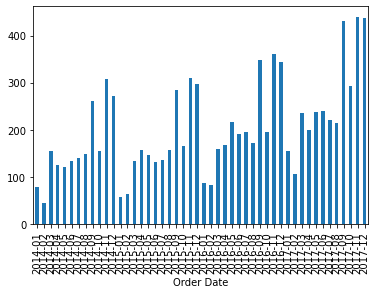

In [12]:
# Ploating this monthly_revenue_data
monthly_revenue_data.groupby('Order Date')['Sales'].nunique().plot(kind='bar')
plt.show()

In [13]:
# ( Task ) Find out yearly revenue

# Create column with year field only
year = pd.to_datetime(orders['Order Date']).dt.to_period('Y')
print(year)
print(type(year))

0       2016
1       2016
2       2016
3       2015
4       2015
        ... 
9989    2014
9990    2017
9991    2017
9992    2017
9993    2017
Name: Order Date, Length: 9994, dtype: period[A-DEC]
<class 'pandas.core.series.Series'>


In [14]:
# Creating seperate dataset with year and Sales
yearly_sales_data = pd.concat([year, orders['Sales']], axis=1)
print(yearly_sales_data)

     Order Date     Sales
0          2016  261.9600
1          2016  731.9400
2          2016   14.6200
3          2015  957.5775
4          2015   22.3680
...         ...       ...
9989       2014   25.2480
9990       2017   91.9600
9991       2017  258.5760
9992       2017   29.6000
9993       2017  243.1600

[9994 rows x 2 columns]


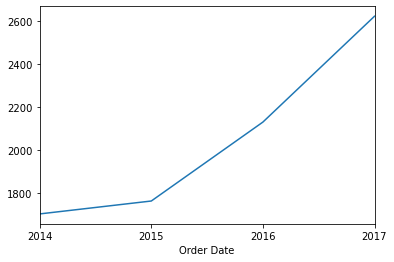

In [15]:
# Plot dataset for yearly_sales_data
yearly_sales_data.groupby('Order Date')['Sales'].nunique().plot(kind='line')
plt.show()

In [16]:
# ( Task ) Monthly growth rate

# Create a column in the monthly revenue dataset for monthly growth rate
# print(monthly_revenue_data)

In [17]:
# ( Task ) Most and least sold product id

# Create new dataset having product ids and total quantity sold
pid_qty = pd.concat([orders['Product ID'], orders['Quantity']], axis=1)
pid_qty.columns

Index(['Product ID', 'Quantity'], dtype='object')

In [18]:
# Most and least sold product id

max_pid_qty = pid_qty[pid_qty['Quantity'] == pid_qty['Quantity'].max()]
# print(max_pid_qty['Product ID'])

print("No. of most sold products: " + str(len(max_pid_qty.index)))
print("Product IDs of most sold products: ", end='\n\n')
print((max_pid_qty['Product ID']).to_string(index=False))
print('\n\n')

min_pid_qty = pid_qty[pid_qty['Quantity'] == pid_qty['Quantity'].min()]
# print(min_pid_qty)

print("No. of least sold products: " + str(len(min_pid_qty.index)))
print("Product IDs of least sold products: ", end='\n\n')
print((min_pid_qty['Product ID']).to_string(index=False))

No. of most sold products: 29
Product IDs of most sold products: 

OFF-FA-10000621
FUR-FU-10001706
OFF-PA-10004530
OFF-ST-10001511
FUR-CH-10002304
OFF-BI-10001036
OFF-LA-10003510
FUR-CH-10000513
OFF-AP-10002684
TEC-PH-10001557
OFF-BI-10000174
OFF-PA-10002137
OFF-ST-10000943
TEC-PH-10000673
FUR-FU-10001473
OFF-BI-10004728
FUR-CH-10004477
OFF-PA-10002254
TEC-AC-10003289
TEC-PH-10000011
FUR-FU-10003664
OFF-BI-10000343
FUR-FU-10002268
TEC-AC-10001908
OFF-PA-10001954
OFF-AR-10003631
FUR-CH-10000553
TEC-AC-10001772
OFF-BI-10002026



No. of least sold products: 899
Product IDs of least sold products: 

FUR-CH-10003061
OFF-AR-10001868
OFF-BI-10004654
OFF-ST-10004123
OFF-AP-10002118
OFF-ST-10002370
TEC-AC-10001998
OFF-PA-10000304
OFF-BI-10004738
TEC-PH-10002844
OFF-AR-10000390
OFF-BI-10003650
OFF-PA-10001736
OFF-PA-10002751
OFF-AR-10001940
OFF-AP-10003622
OFF-ST-10001522
OFF-AR-10001026
OFF-ST-10002485
OFF-PA-10004569
OFF-ST-10004180
OFF-AR-10001427
OFF-BI-10002706
OFF-AR-10002804
FUR-FU-10001

In [19]:
# ( Task ) Find out customers who bought most and least Quantity

# Create a dataset with name, Quantity
customer_qty = pd.concat([orders['Customer Name'], orders['Quantity']], axis=1)
customer_qty.columns

Index(['Customer Name', 'Quantity'], dtype='object')

In [20]:
customer_max_qty = customer_qty[customer_qty['Quantity'] == customer_qty['Quantity'].max()]
# print(customer_max_qty)

print("No. of most sold products: " + str(len(customer_max_qty.index)))
print("Customer name who bought most quantity: ", end='\n\n')
print((customer_max_qty['Customer Name']).to_string(index=False))

No. of most sold products: 29
Customer name who bought most quantity: 

        Ryan Crowe
    Lena Creighton
      Trudy Glocke
 Cassandra Brandow
      Steve Nguyen
         Ann Blume
   Damala Kotsonis
      Irene Maddox
      Jamie Kunitz
       Kean Nguyen
    Mike Pelletier
    Kelly Andreada
Christopher Schild
      Chris Cortes
   Andrew Gjertsen
      Sanjit Engle
    Thomas Brumley
        Julia West
   Shirley Schmidt
  Giulietta Weimer
   Alejandro Grove
      Janet Martin
       Mark Packer
      Ben Peterman
     Sanjit Jacobs
 Delfina Latchford
       Ben Wallace
          John Lee
        Anne Pryor


In [21]:
# ( Task ) Find out customer who bought most and least in terms of value

# Create dataset with Customer Name, Sales
customer_sales = pd.concat([orders['Customer Name'], orders['Sales']], axis=1)
customer_sales.columns

Index(['Customer Name', 'Sales'], dtype='object')

In [22]:
# Find out who customer name who bought highest in terms of sales
customer_max_sales = customer_sales[customer_sales['Sales'] == customer_sales['Sales'].max()]
# print(customer_max_sales)

print("Customer name who bought highest value: ")
print((customer_max_sales['Customer Name']).to_string(index=False))

Customer name who bought highest value: 
Sean Miller


In [23]:
# ( Task ) Finding out the majority and minority customer cities based on: a) Number of customers b) Sales value

# Number of customers
group_a = orders.groupby(["City"]).size().reset_index(name='Number of Customers')
# group_a

In [24]:
group_a.sort_values(by=['Number of Customers'], inplace=True, ascending=False)
group_a

,City,Number of Customers
329,New York City,915
266,Los Angeles,747
374,Philadelphia,537
438,San Francisco,510
452,Seattle,428
...,...,...
402,Redwood City,1
203,Holyoke,1
398,Redding,1
213,Iowa City,1


In [25]:
# Sales value
group_b = orders.groupby(["Sales"]).size().reset_index(name='Number of Customers')
group_b

,Sales,Number of Customers
0,0.444,1
1,0.556,1
2,0.836,1
3,0.852,1
4,0.876,1
...,...,...
6139,10499.970,1
6140,11199.968,1
6141,13999.960,1
6142,17499.950,1


In [26]:
# ( Task ) Find out the most and least sold product category from the store: a) Value based b) Quantity based

groupby_category_value_based = orders.groupby(["Category"]).sum().sort_values("Sales", ascending=False)

# group_category_value_based
print("Most sold product Category based on Sales:")
print(groupby_category_value_based['Sales'].head(1))
print()

print("Least sold product Category based on Sales:")
print(groupby_category_value_based['Sales'].tail(1))

Most sold product Category based on Sales:
Category
Technology    836154.033
Name: Sales, dtype: float64

Least sold product Category based on Sales:
Category
Office Supplies    719047.032
Name: Sales, dtype: float64


In [27]:
groupby_category_qty_based  = orders.groupby(["Category"]).sum().sort_values("Quantity", ascending=False)

print("Most sold product Category based on Qunatity:")
print(groupby_category_qty_based['Quantity'].head(1))
print()

print("Least sold product Category based on Qunatity:")
print(groupby_category_qty_based['Quantity'].tail(1))

Most sold product Category based on Qunatity:
Category
Office Supplies    22906
Name: Quantity, dtype: int64

Least sold product Category based on Qunatity:
Category
Technology    6939
Name: Quantity, dtype: int64


In [28]:
group_subcategory_value_based = orders.groupby(["Sub-Category"]).sum().sort_values("Sales", ascending=False)

print("Most sold product sub category based on sales:")
print(group_subcategory_value_based['Sales'].head(1))
print()

print("Least sold product sub category based on sales:")
print(group_subcategory_value_based['Sales'].tail(1))

Most sold product sub category based on sales:
Sub-Category
Phones    330007.054
Name: Sales, dtype: float64

Least sold product sub category based on sales:
Sub-Category
Fasteners    3024.28
Name: Sales, dtype: float64


In [29]:
groupby_subcategory_qty_based  = orders.groupby(["Sub-Category"]).sum().sort_values("Quantity", ascending=False)

print("Most sold product sub category based on quantity:")
print((groupby_subcategory_qty_based['Quantity'].head(1)))
print()

print("Least sold product sub category based on quantity:")
print((groupby_subcategory_qty_based['Quantity'].tail(1)))

Most sold product sub category based on quantity:
Sub-Category
Binders    5974
Name: Quantity, dtype: int64

Least sold product sub category based on quantity:
Sub-Category
Copiers    234
Name: Quantity, dtype: int64
